In [1]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# create a dictionary that holds lists
all_records = {
    "Men's Volleyball": ['https://ccnyathletics.com/sports/mens-volleyball/roster', 'https://lehmanathletics.com/sports/mens-volleyball/roster', 'https://www.brooklyncollegeathletics.com/sports/mens-volleyball/roster', 'https://johnjayathletics.com/sports/mens-volleyball/roster', 'https://athletics.baruch.cuny.edu/sports/mens-volleyball/roster', 'https://mecathletics.com/sports/mens-volleyball/roster', 'https://www.huntercollegeathletics.com/sports/mens-volleyball/roster', 'https://yorkathletics.com/sports/mens-volleyball/roster', 'https://ballstatesports.com/sports/mens-volleyball/roster'],
    "Women's Volleyball": ['https://bmccathletics.com/sports/womens-volleyball/roster', 'https://yorkathletics.com/sports/womens-volleyball/roster', 'https://hostosathletics.com/sports/womens-volleyball/roster', 'https://bronxbroncos.com/sports/womens-volleyball/roster/2021', 'https://queensknights.com/sports/womens-volleyball/roster', 'https://augustajags.com/sports/wvball/roster', 'https://flaglerathletics.com/sports/womens-volleyball/roster', 'https://pacersports.com/sports/womens-volleyball/roster', 'https://www.golhu.com/sports/womens-volleyball/roster'],
    "Men's Swimming": ['https://csidolphins.com/sports/mens-swimming-and-diving/roster', 'https://yorkathletics.com/sports/mens-swimming-and-diving/roster', 'https://athletics.baruch.cuny.edu/sports/mens-swimming-and-diving/roster', 'https://www.brooklyncollegeathletics.com/sports/mens-swimming-and-diving/roster', 'https://lindenwoodlions.com/sports/mens-swimming-and-diving/roster', 'https://mckbearcats.com/sports/mens-swimming-and-diving/roster', 'https://ramapoathletics.com/sports/mens-swimming-and-diving/roster', 'https://oneontaathletics.com/sports/mens-swimming-and-diving/roster', 'https://bubearcats.com/sports/mens-swimming-and-diving/roster/2021-22', 'https://albrightathletics.com/sports/mens-swimming-and-diving/roster/2021-22'],
    "Women's Swimming": ['https://csidolphins.com/sports/womens-swimming-and-diving/roster', 'https://queensknights.com/sports/womens-swimming-and-diving/roster', 'https://yorkathletics.com/sports/womens-swimming-and-diving/roster', 'https://athletics.baruch.cuny.edu/sports/womens-swimming-and-diving/roster/2021-22?path=wswim', 'https://www.brooklyncollegeathletics.com/sports/womens-swimming-and-diving/roster', 'https://lindenwoodlions.com/sports/womens-swimming-and-diving/roster', 'https://mckbearcats.com/sports/womens-swimming-and-diving/roster', 'https://ramapoathletics.com/sports/womens-swimming-and-diving/roster', 'https://keanathletics.com/sports/womens-swimming-and-diving/roster', 'https://oneontaathletics.com/sports/womens-swimming-and-diving/roster']
}

In [3]:
def webScrap(list_of_urls):

    names_list = [] # names in ALL of the URLs
    heights_list = []
    for url in list_of_urls: # iterate through each url in the list of urls

        page = requests.get(url) # make a request to the server where the website is hosted
        statusCode = page.status_code #checks the status code

        if statusCode == 200: # if the status code is 200, continue with the program.
            soup = BeautifulSoup(page.content, 'html.parser') # import raw html into BeautifulSoup

            heights = soup.find_all('td', class_ = 'height')

            names = soup.find_all('td', class_ = 'sidearm-table-player-name')

            for name, height in zip(names, heights): # tuple unpacking
                name = name.get_text().strip('\n') # remove the newline character between each line
                height = height.get_text().strip('\n')

                if height == '-':
                    height = np.nan # replace empty cells with nan (later on, they will be replaced with the average)

                else:
                    height = height.split('-') # split string using - as a separator
                    feet = float(height[0]) # the first value is in feet
                    inches = float(height[1]) # the second value is in inches
                    height = 12 * feet + inches


                names_list.append(name)
                heights_list.append(height)

    #to create the dataframes
    athletes_heights = {'Name': names_list, 'Height': heights_list}
    height_df = pd.DataFrame(athletes_heights)

    avg = height_df['Height'].mean() # find the mean height of the height column
    height_df['Height'] = height_df['Height'].fillna(avg) # fill the missing cells with the mean height

    return height_df, avg # returns both dataframe and average as a tuple


**Men's Volleyball**

In [4]:
men_vball_df, men_vball_avg = webScrap(all_records["Men's Volleyball"])


In [5]:
men_vball_df

,Name,Height
0,Angel Gabriel Chabla,63.000000
1,Jeffrey Celis,69.000000
2,Edwin Fierros Gaytan,68.000000
3,Prabodh KC,72.000000
4,Ethan Sherpa,71.000000
...,...,...
119,Braydon Savitski-Lynde,72.213115
120,Patrick Rogers,79.000000
121,Lukas Pytlak,74.000000
122,Will Patterson,82.000000


In [6]:
# Average
print(f"The average height of the men's volleyball team is {men_vball_avg} inches")

The average height of the men's volleyball team is 72.21311475409836 inches


In [7]:
# Converting to csv file
men_vball_df.to_csv("men_volleyball.csv", index= False)

5 Tallest Men Volleyball Players

In [8]:
men_vball_df.nlargest(5, 'Height')

,Name,Height
122,Will Patterson,82.0
48,Kyle Barriffe-Johnson,79.0
67,Akil Vaughn,79.0
106,Griffin Satterfield,79.0
120,Patrick Rogers,79.0


5 Shortest Men Volleyball Players

In [9]:
men_vball_df.nsmallest(5, 'Height')

,Name,Height
0,Angel Gabriel Chabla,63.0
16,Chris Mata,63.0
34,Bryce Glasper,64.0
22,Wai Lin,65.0
32,Dion Csikortos,65.0


**Women's Volleyball**

In [10]:
women_vball_df, women_vball_avg = webScrap(all_records["Women's Volleyball"])

In [11]:
women_vball_df

,Name,Height
0,Crystal Saw,64.000
1,Yisneily Morales,61.000
2,Sarah Sellami,68.000
3,Marie Claire Hurtado,67.664
4,Garyana Altidor,61.000
...,...,...
121,Sabrina Valentin,68.000
122,Sherian Horner,71.000
123,Alyssa Daley,75.000
124,Myka Costanzo,64.000


In [12]:
# Average
print(f"The average height of the women's volleyball team is {women_vball_avg} inches")

The average height of the women's volleyball team is 67.664 inches


In [13]:
# Converting to csv file
women_vball_df.to_csv("women_volleyball.csv", index= False)

5 Tallest Women Volleyball Players

In [14]:
women_vball_df.nlargest(5, 'Height')

,Name,Height
70,Kayli Cleaver,76.0
65,Savannah Davis,75.0
67,Sophia Kruczko,75.0
86,Molly Boyd,75.0
123,Alyssa Daley,75.0


5 Shortest Women Volleyball Players

In [15]:
women_vball_df.nsmallest(5, 'Height')

,Name,Height
26,Samara Correa,60.0
1,Yisneily Morales,61.0
4,Garyana Altidor,61.0
17,Jasmine Vega,61.0
34,Rashel Torres,61.0


**Men's Swimming**

In [16]:
men_swim_df, men_swim_avg = webScrap(all_records["Men's Swimming"])

In [17]:
men_swim_df

,Name,Height
0,Anthony Attenborough,70.0
1,James Curran,69.0
2,Charles Cusumano,64.0
3,David Fayngersh,70.0
4,Michael Graham,70.0
...,...,...
171,Kieran Hassard,72.0
172,Anthony Laite,69.0
173,Drew MacDonald,72.0
174,Kyle Morken,73.0


In [18]:
# Average
print(f"The average height of the men's swim team is {men_swim_avg} inches")

The average height of the men's swim team is 71.35714285714286 inches


In [19]:
# Converting to csv file
men_swim_df.to_csv("men_swim.csv", index= False)

5 Tallest Men Swimmers

In [20]:
men_swim_df.nlargest(5, 'Height')

,Name,Height
81,Colton Grimes,79.0
104,Tyson Upton,79.0
153,Eric Kroon,77.0
50,Mattia Giurgevich,76.0
64,Adam Szcerba,76.0


5 Shortest Men Swimmers

In [21]:
men_swim_df.nsmallest(5, 'Height')

,Name,Height
78,Miles Fleischer,63.0
2,Charles Cusumano,64.0
41,Joseph Scarpetta,65.0
86,Wyatt Kurtz,65.0
111,Samuel De Leon,65.0


**Women's Swimming**

In [22]:
women_swim_df, women_swim_avg = webScrap(all_records["Women's Swimming"])

In [23]:
women_swim_df

,Name,Height
0,Aurelia Barbagallo,63.000
1,Jacqueline DeFranco,65.000
2,Katherine Ebrahim,69.000
3,Jessica Johnson,68.000
4,Brooke Manning,66.000
...,...,...
148,Emma Stephenson,67.000
149,Callie Stinson,64.000
150,Alyssa Thompson,65.888
151,Samantha Vezza,65.888


In [24]:
# Average
print(f"The average height of the women's swim team is {women_swim_avg} inches")

The average height of the women's swim team is 65.888 inches


In [25]:
# Converting to csv file
women_swim_df.to_csv("women_swim.csv", index= False)

5 Tallest Women Swimmers

In [26]:
women_swim_df.nlargest(5, 'Height')

,Name,Height
80,McKenzie Fazio,75.0
68,Maja Piotrowicz,73.0
51,Kornelia Buszka,71.0
85,Presley Heitzmann,71.0
117,Grace Geyer,71.0


5 Shortest Women Swimmers

In [27]:
women_swim_df.nsmallest(5, 'Height')

,Name,Height
22,Melanie Rodriguez,59.0
26,Micaela Reyes,59.0
12,Asha Besaw,61.0
18,Kristen Flores,61.0
31,Amanda Lee,61.0


**Bar Graph**

In [28]:
averageHeights = {"Team Category": ["Men's Volleyball Team", "Women's Volleyball Team", "Men's Swim Team", "Women's Swim Team"],
                  "Average Height": [men_vball_avg, women_vball_avg, men_swim_avg, women_swim_avg]

}

In [29]:
averageHeightsDataFrame = pd.DataFrame(averageHeights)

In [30]:
averageHeightsDataFrame # a comparison of the 4 groups

,Team Category,Average Height
0,Men's Volleyball Team,72.213115
1,Women's Volleyball Team,67.664000
2,Men's Swim Team,71.357143
3,Women's Swim Team,65.888000


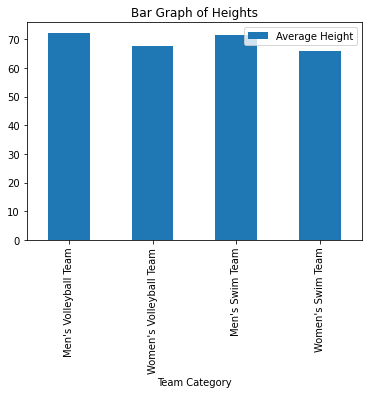

In [33]:
averageHeightsDataFrame.plot.bar(x='Team Category', y='Average Height', rot=90, title='Bar Graph of Heights' )
plt.show()